In [224]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [225]:
#Load data
df = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape', index_col=0)

In [226]:
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


# EDA

In [227]:
#Fetching only relevant column
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [228]:
#Describe the data
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [229]:
df['cc'].nunique()

13

In [230]:
#Rename the column
df.rename(columns={"Age_08_04":"Age"},inplace=True)
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [231]:
#Null values
df.isna().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [232]:
#Number of duplicate values
df.duplicated().sum()

1

In [233]:
#Drop the duplicate values
df.drop_duplicates(inplace=True)

# Visualization

# Multicollinearity: 
    1.Scatterplot matrix 
    2.Correlation
    3.VIF

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Correlation between independent columns should be low and Correlation between dependent and indepedent column should be high

<AxesSubplot:>

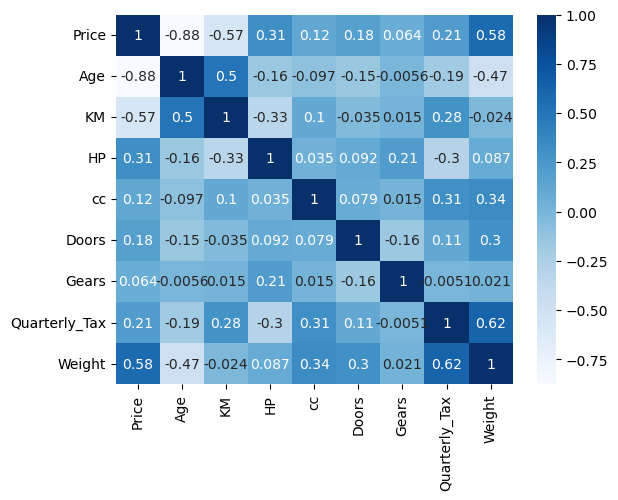

In [234]:
#Visulization- Heatmap correlation

sns.heatmap(df.corr(), cmap='Blues' ,annot=True)

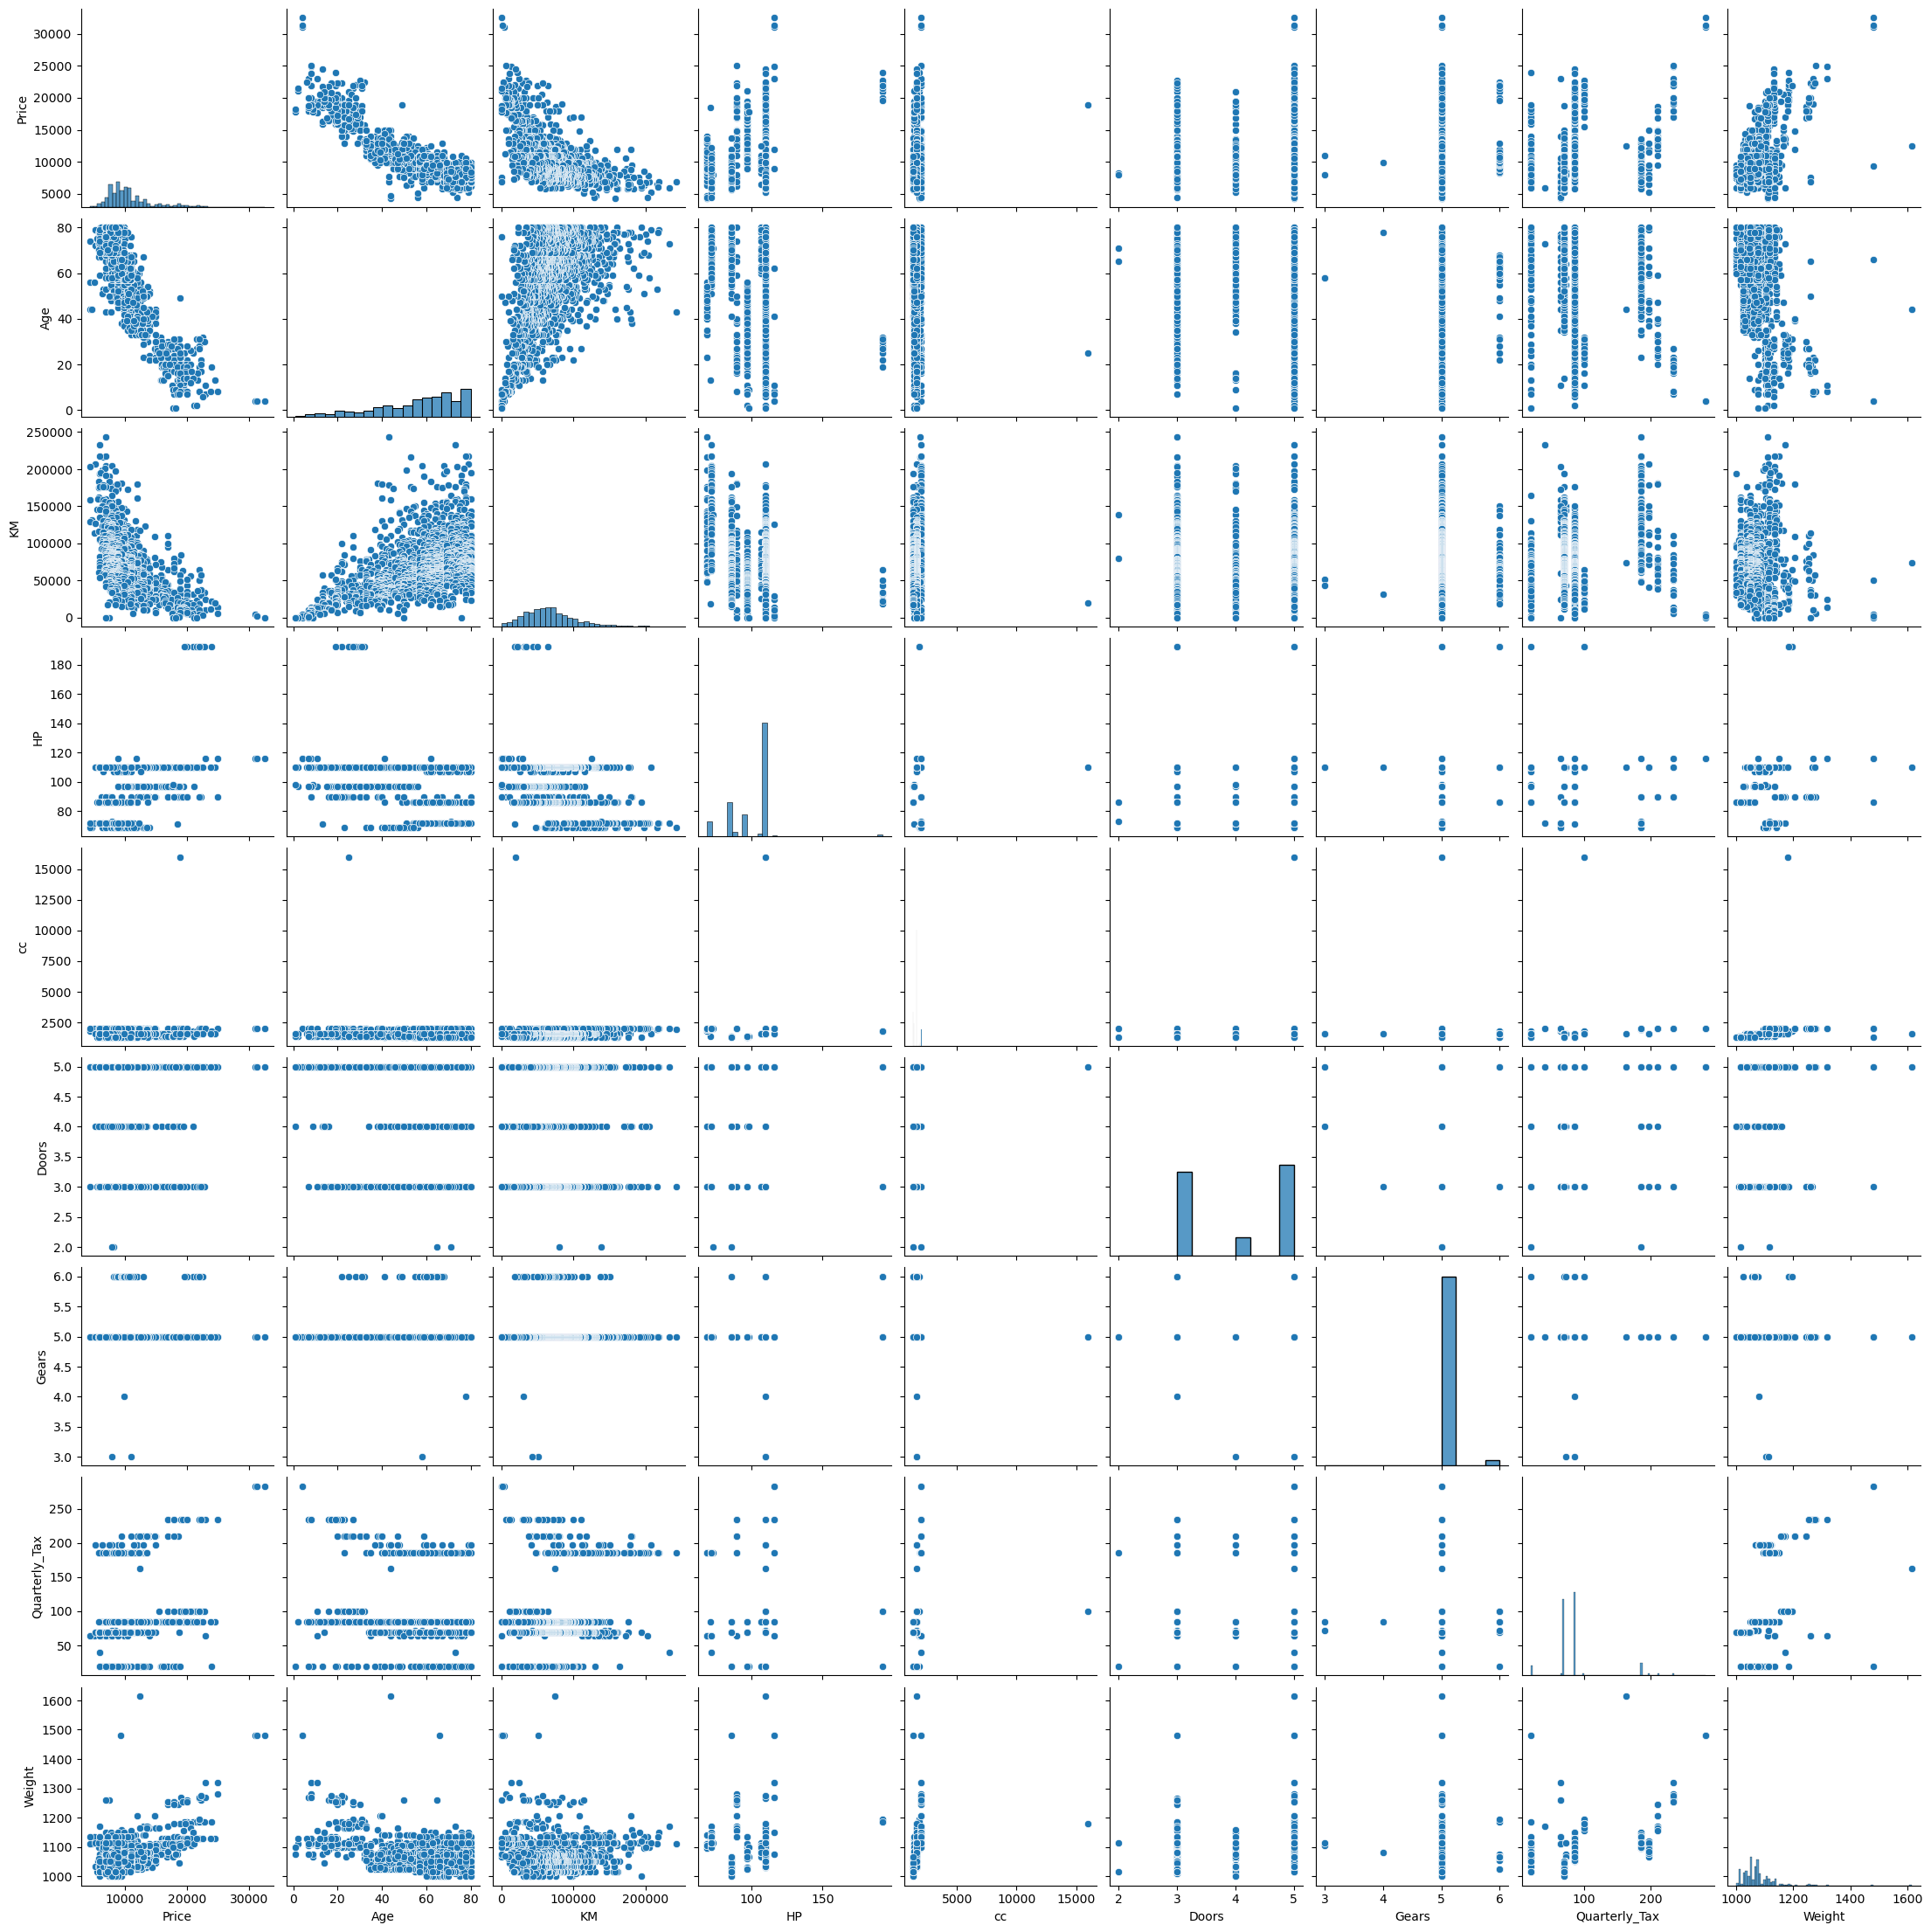

In [235]:
sns.pairplot(df)

From above pairplot we can say there is no 2 independent columns are related to each other

# VIF

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [237]:
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [238]:
vif['features'] = df.columns
vif

,VIF,features
0,70.770259,Price
1,46.662057,Age
2,9.005938,KM
3,71.361440,HP
4,17.201048,cc
5,21.856498,Doors
6,439.792421,Gears
7,11.187125,Quarterly_Tax
8,668.038614,Weight


From above values there is no two independent columns have equal values. Hence there is no multicollinearity

# Model building

In [279]:
df.head()

,Id,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Quaterly_Tax
0,1,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
1,2,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
2,3,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
3,4,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
4,5,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,210,1.870688,3.003513


In [240]:
#Scale the data using Standard scalerRd
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
df[['Price','Age','KM','HP','cc','Doors','Gears','Quaterly_Tax','Weight']] = stdscaler.fit_transform(df)

In [241]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Quaterly_Tax'],
      dtype='object')

In [242]:
# initialisisng x and y
x=df.iloc[:,1:]
y=df.iloc[:,1]

# splitting dataset into test and train
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# object creation and train the model
from sklearn.linear_model import LinearRegression

startModel=LinearRegression()
startModel.fit(xtrain,ytrain)

# Predicting the label

ytrainPredict=startModel.predict(xtrain)
ytestPredict=startModel.predict(xtest)

# Evaluating the output 
from sklearn.metrics import r2_score,mean_squared_error

r2scoretrain=r2_score(ytrain,ytrainPredict)
r2scoretest=r2_score(ytest,ytestPredict)

print("Coefficient of determination r2Score-train =",r2scoretrain)
print("Coefficient of determination r2Score-test =",r2scoretest)

meansquarederrortrain=mean_squared_error(ytrain,ytrainPredict)
meansquarederrortest=mean_squared_error(ytest,ytestPredict)

print("Mean Squared Error for train =",meansquarederrortrain)
print("Mean Squared Error for test =",meansquarederrortest)

Coefficient of determination r2Score-train = 1.0
Coefficient of determination r2Score-test = 1.0
Mean Squared Error for train = 1.4592588252866672e-29
Mean Squared Error for test = 1.289230078761468e-29


# Model validation technique

# 1. Residual Analysis

In [243]:
# Build the Linear Regression model
import statsmodels.formula.api as smf
model =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [244]:
model.resid

Id
1      -0.912538
2      -0.694059
3      -0.784381
4      -0.403548
5      -0.679206
          ...   
1438   -0.358770
1439    0.707537
1440    0.012354
1441   -0.368463
1442   -0.955263
Length: 1435, dtype: float64

# Q-Q plot:
    Checking for normality

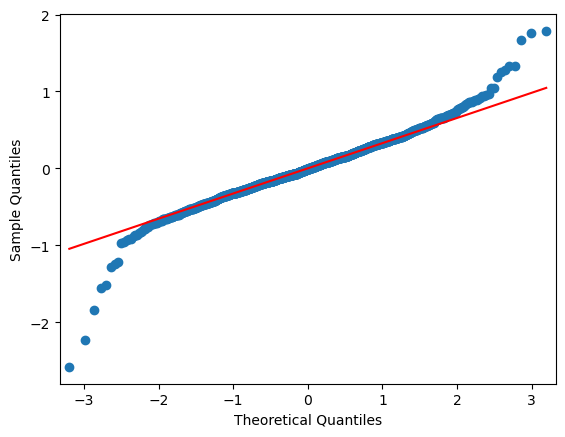

In [245]:
sm.qqplot(model.resid, line='q');

# 2.Residual plot of Homoscedasticity

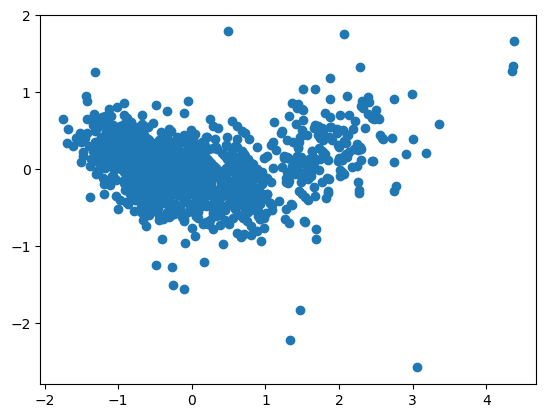

In [246]:
#No paatern then model is good
plt.scatter(model.fittedvalues,model.resid)

# 3.Residual VS Regressor:
    -Zero mean

In [247]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight', 'Quaterly_Tax'],
      dtype='object')

In [248]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Quaterly_Tax
Id,,,,,,,,,,
1,0.770368,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
2,0.839669,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
3,0.895109,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
4,1.172311,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,210,1.774964,3.003513
5,0.839669,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,210,1.870688,3.003513


eval_env: 1


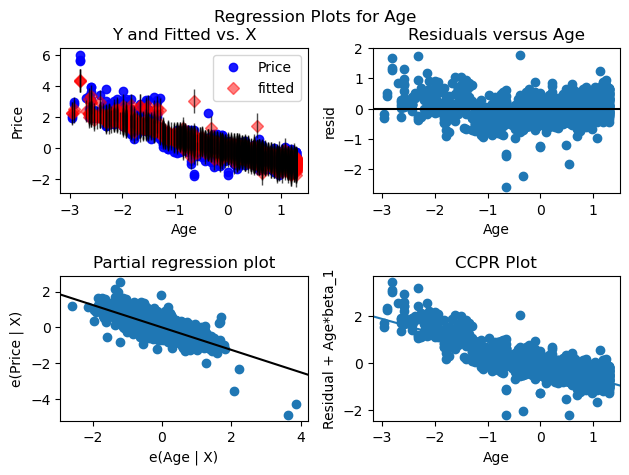

In [249]:
sm.graphics.plot_regress_exog(model,'Age');

eval_env: 1


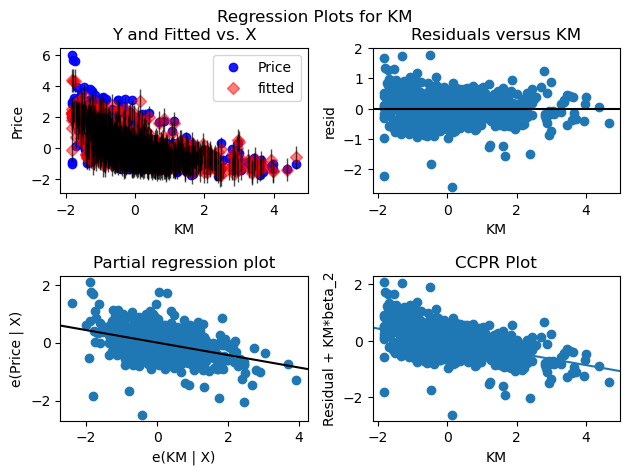

In [250]:
sm.graphics.plot_regress_exog(model,'KM');

eval_env: 1


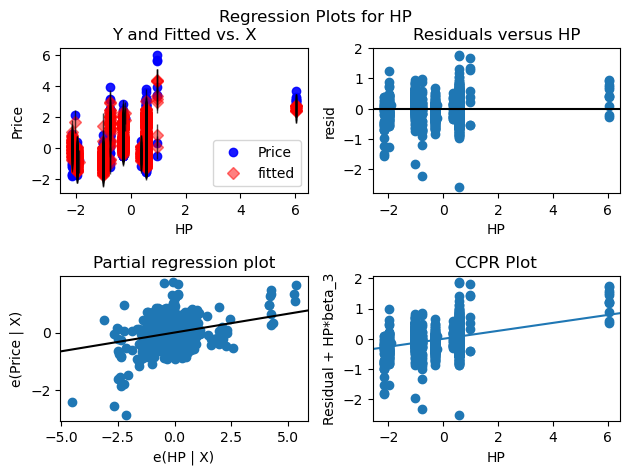

In [251]:
sm.graphics.plot_regress_exog(model,'HP');

eval_env: 1


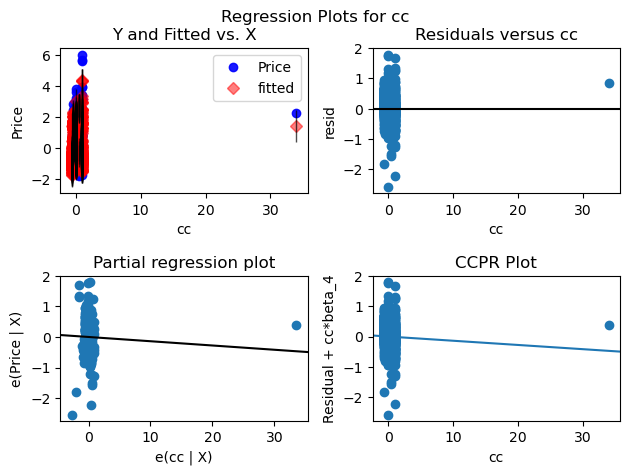

In [252]:
sm.graphics.plot_regress_exog(model,'cc');

eval_env: 1


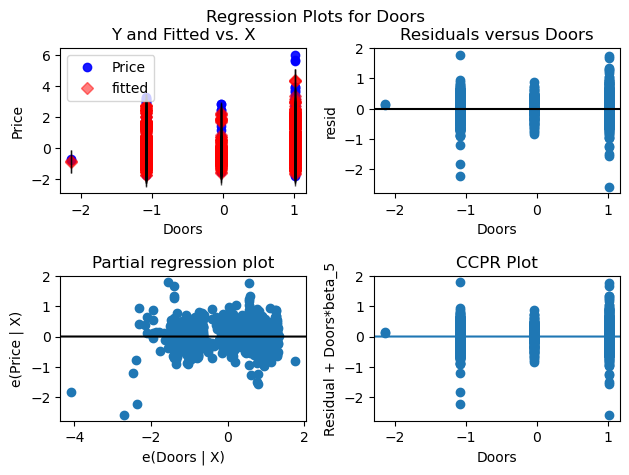

In [253]:
sm.graphics.plot_regress_exog(model,'Doors');

eval_env: 1


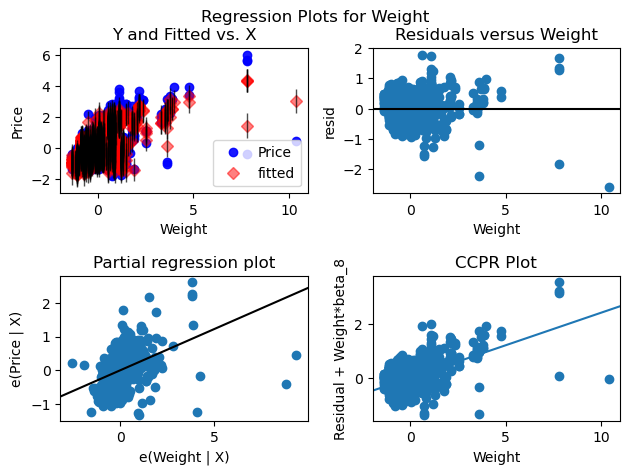

In [254]:
sm.graphics.plot_regress_exog(model,'Weight');

# Cook's distance

<StemContainer object of 3 artists>

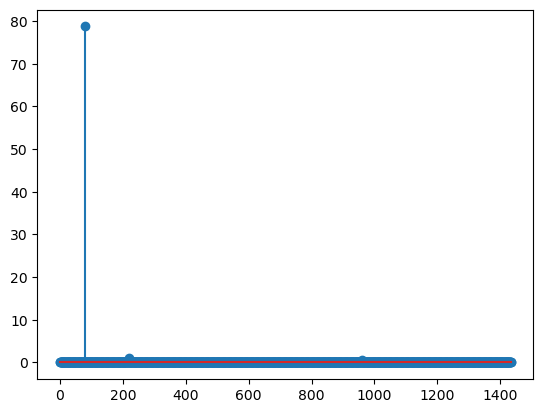

In [255]:
inf=model.get_influence()
c,p = inf.cooks_distance

# Cook's distance plot
plt.stem(c)

In [256]:
#Here we can se there are lot of influential datapoints which need to be deleted
np.argmax(c),np.max(c)

(80, 78.7295058225615)

In [257]:
df.iloc[[80]]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Quaterly_Tax
Id,,,,,,,,,,
81,2.28112,-1.669491,-1.2955,0.568103,33.99833,1.015659,-0.140475,100,2.062135,0.317003


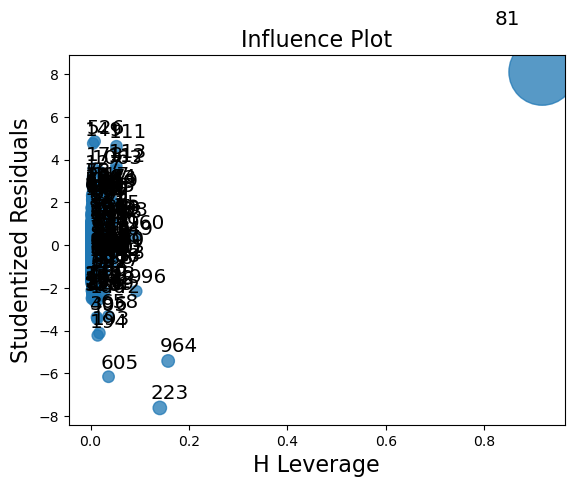

In [258]:
#Influence Plot
influence_plot(model);

In [259]:
#Improving the model by dropping row 81(Influence data point)

In [260]:
df.drop(index=[81],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [ ]:
# Building the model again after dropping the influence data point

In [266]:
model =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

<StemContainer object of 3 artists>

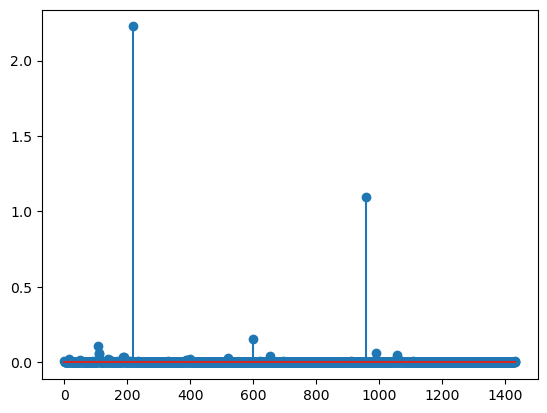

In [267]:
inf = model.get_influence()
c,p = inf.cooks_distance
plt.stem(c)

In [268]:
np.argmax(c),np.max(c)

(219, 2.225351365527398)

In [269]:
df.drop(index=[219],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [270]:
#Building the model again after dropping the influence data point

<StemContainer object of 3 artists>

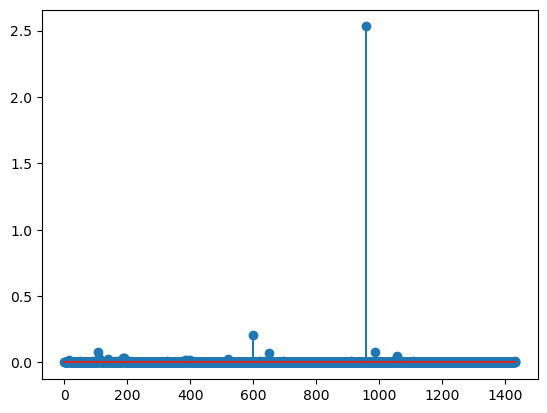

In [271]:
import statsmodels.formula.api as smf
model =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
inf = model.get_influence()
c,p = inf.cooks_distance
plt.stem(c)

In [272]:
np.argmax(c),np.max(c)

(957, 2.5307796232782738)

In [273]:
df.drop(index=[957],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [274]:
#Building the model again after dropping the influence data point

<StemContainer object of 3 artists>

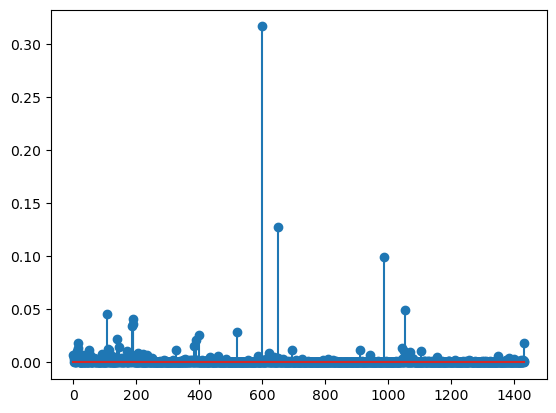

In [275]:
import statsmodels.formula.api as smf
model =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()
inf = model.get_influence()
c,p = inf.cooks_distance
plt.stem(c)

From the above cook's distance graph, we can say we have dropped all the influence data point

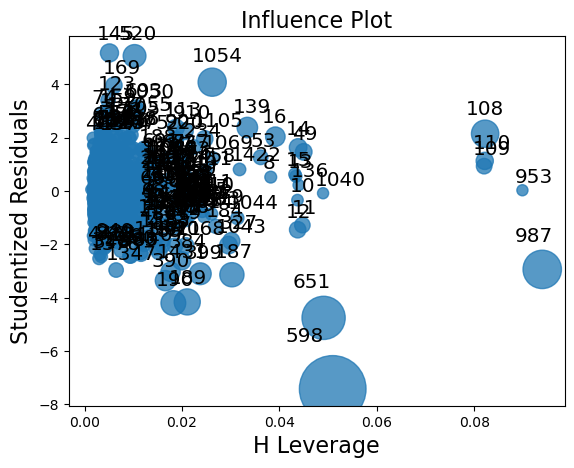

In [276]:
#Influence Plot
influence_plot(model);